In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

color_discrete_map = {
    "Same/Mostly Same": "rgb(0,114,178)",
    "Same": "rgb(0,114,178)",
    "Different/Mostly Different": "rgb(213,94,0)",
    "Same/Different": "rgb(213,94,0)"
}

Code for generating the mAP figures. The data tables were generated by `1.0.calculate-map-cp.ipynb`.

In [2]:
cp_replicability_df = (
    pd.read_csv("output/cellprofiler_replicability_map.csv")
    .replace({"compound": "Compound", "crispr": "CRISPR", "orf": "ORF"})
    .assign(feature_set="CellProfiler")
)

cp_replicability_df["well_position"] = np.where(
    cp_replicability_df["Modality"] == "ORF", "Different/Mostly Different", "Same/Mostly Same"
)

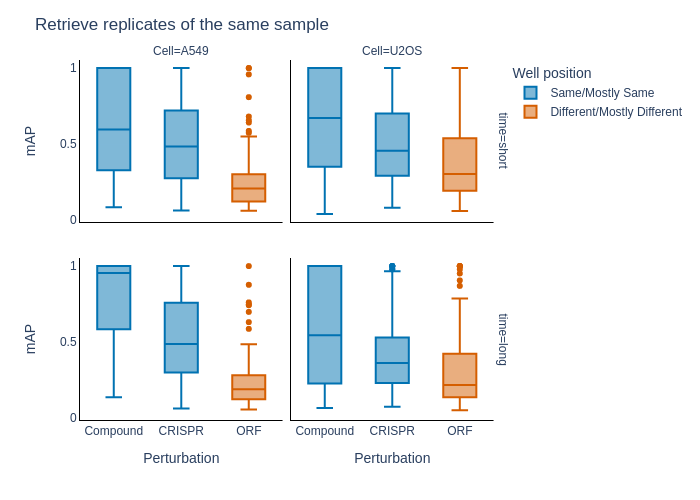

In [3]:
fig = px.box(
    data_frame=cp_replicability_df,
    x="Modality",
    y="mean_average_precision",
    color="well_position",
    boxmode="overlay",
    facet_row="time",
    facet_col="Cell",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.1,
)

fig.update_layout(
    title="Retrieve replicates of the same sample",
    xaxis1=dict(title="Perturbation", linecolor="#000000"),
    xaxis2=dict(title="Perturbation", linecolor="#000000"),
    xaxis3=dict(linecolor="#000000"),
    xaxis4=dict(linecolor="#000000"),
    yaxis1=dict(title="mAP", linecolor="#000000"),
    yaxis2=dict(linecolor="#000000"),
    yaxis3=dict(title="mAP", linecolor="#000000"),
    yaxis4=dict(linecolor="#000000"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    legend=dict(
        title="Well position",
    )
)
fig.show("png")
fig.write_image(f"figures/2.replicability_map_with_legend.png", width=640, height=480, scale=2)

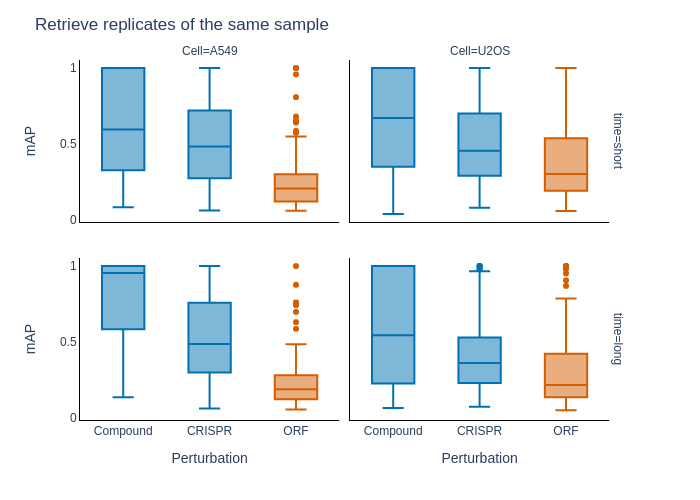

In [4]:
fig = px.box(
    data_frame=cp_replicability_df,
    x="Modality",
    y="mean_average_precision",
    color="well_position",
    boxmode="overlay",
    facet_row="time",
    facet_col="Cell",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.1,
)

fig.update_layout(
    title="Retrieve replicates of the same sample",
    xaxis1=dict(title="Perturbation", linecolor="#000000"),
    xaxis2=dict(title="Perturbation", linecolor="#000000"),
    xaxis3=dict(linecolor="#000000"),
    xaxis4=dict(linecolor="#000000"),
    yaxis1=dict(title="mAP", linecolor="#000000"),
    yaxis2=dict(linecolor="#000000"),
    yaxis3=dict(title="mAP", linecolor="#000000"),
    yaxis4=dict(linecolor="#000000"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False,
)
fig.show("png")
fig.write_image(f"figures/2.replicability_map.png", width=640, height=480, scale=2)

In [5]:
cp_matching_df = (
    pd.read_csv("output/cellprofiler_matching_map.csv")
    .assign(Cell_timepoint=lambda x: x.Cell + "_" + x.time)
    .assign(feature_set="CellProfiler")
    .replace({"compound": "Compound", "crispr": "CRISPR", "orf": "ORF"})
)

cp_matching_df["well_position"] = "Different/Mostly Different"

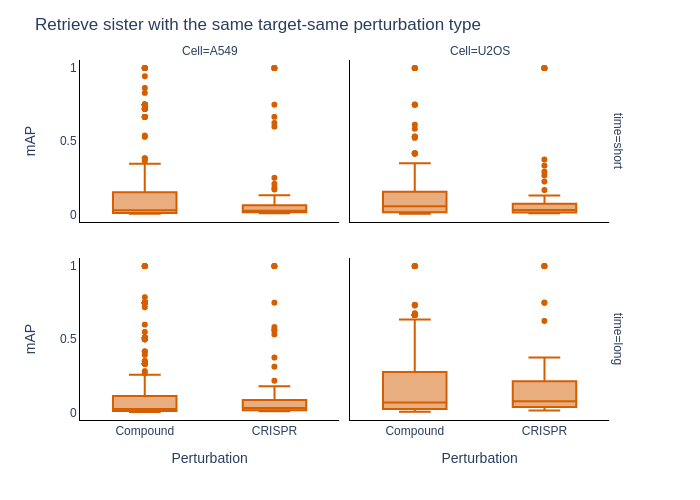

In [6]:
fig = px.box(
    data_frame=cp_matching_df,
    x="Modality",
    y="mean_average_precision",
    color="well_position",
    boxmode="overlay",
    facet_row="time",
    facet_col="Cell",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.1,
)

fig.update_layout(
    title="Retrieve sister with the same target-same perturbation type",
    xaxis1=dict(title="Perturbation", linecolor="#000000"),
    xaxis2=dict(title="Perturbation", linecolor="#000000"),
    xaxis3=dict(linecolor="#000000"),
    xaxis4=dict(linecolor="#000000"),
    yaxis1=dict(title="mAP", linecolor="#000000"),
    yaxis2=dict(linecolor="#000000"),
    yaxis3=dict(title="mAP", linecolor="#000000"),
    yaxis4=dict(linecolor="#000000"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False,
)
fig.show("png")
fig.write_image(f"figures/2.matching_map.png", width=640, height=480, scale=2)

In [7]:
cp_gene_compound_df = (
    pd.read_csv("output/cellprofiler_gene_compound_matching_map.csv")
    .replace({"compound": "Compound", "crispr": "CRISPR", "orf": "ORF"})
    .assign(feature_set="CellProfiler")
)

cp_gene_compound_df["well_position"] = "Different/Mostly Different"

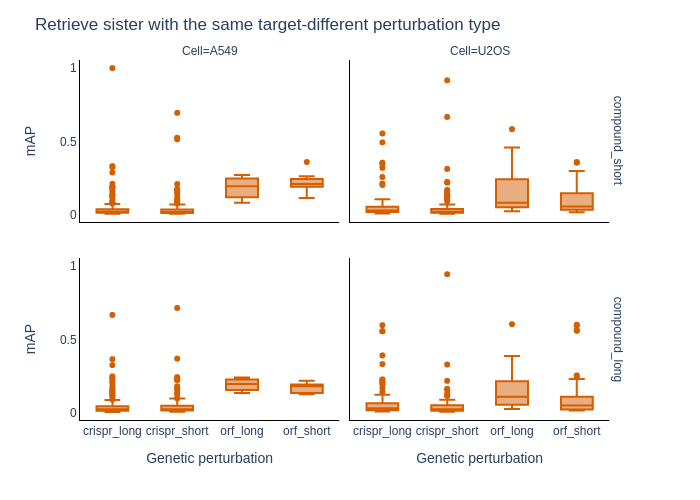

In [8]:
fig = px.box(
    data_frame=cp_gene_compound_df,
    x="Modality2",
    y="mean_average_precision",
    color="well_position",
    boxmode="overlay",
    facet_col="Cell",
    facet_row="Modality1",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.1,
)

fig.update_layout(
    title="Retrieve sister with the same target-different perturbation type",
    xaxis1=dict(title="Genetic perturbation", linecolor="#000000"),
    xaxis2=dict(title="Genetic perturbation", linecolor="#000000"),
    xaxis3=dict(linecolor="#000000"),
    xaxis4=dict(linecolor="#000000"),
    yaxis1=dict(title="mAP", linecolor="#000000"),
    yaxis2=dict(linecolor="#000000"),
    yaxis3=dict(title="mAP", linecolor="#000000"),
    yaxis4=dict(linecolor="#000000"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False,
)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("Modality1=", "")))
fig.show("png")
fig.write_image(
    f"figures/2.gene_compound_matching_map.png", width=640, height=480, scale=2
)

Compare ORF from different well positions and same well positions.

In [9]:
orf_same_position_df = pd.read_csv(
    "output/cellprofiler_replicability_orf_map.csv"
).replace({"orf": "ORF_same"})

orf_same_position_df["well_position"] = "Same"

orf_different_position_df = cp_replicability_df.query("Modality=='ORF'").replace(
    {"ORF": "ORF_different"}
)

orf_different_position_df["well_position"] = "Same/Different"

orf_df = pd.concat([orf_same_position_df, orf_different_position_df], ignore_index=True)

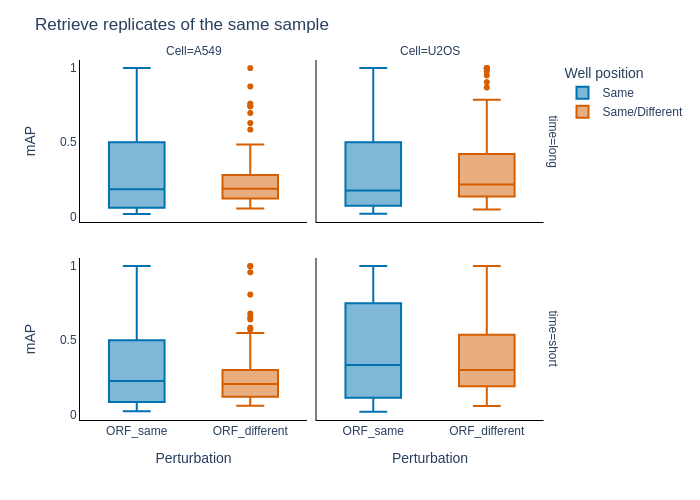

In [10]:
fig = px.box(
    data_frame=orf_df,
    x="Modality",
    y="mean_average_precision",
    color="well_position",
    boxmode="overlay",
    facet_row="time",
    facet_col="Cell",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.1,
)

fig.update_layout(
    title="Retrieve replicates of the same sample",
    xaxis1=dict(title="Perturbation", linecolor="#000000"),
    xaxis2=dict(title="Perturbation", linecolor="#000000"),
    xaxis3=dict(linecolor="#000000"),
    xaxis4=dict(linecolor="#000000"),
    yaxis1=dict(title="mAP", linecolor="#000000"),
    yaxis2=dict(linecolor="#000000"),
    yaxis3=dict(title="mAP", linecolor="#000000"),
    yaxis4=dict(linecolor="#000000"),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    legend=dict(
        title="Well position",
    )
)
fig.show("png")
fig.write_image(f"figures/2.orf_replicability_map.png", width=640, height=480, scale=2)